In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from collections import Counter

## **EDA**

In [2]:
df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Missing Values & Duplicates

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
print(f"Before: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"After: {df.duplicated().sum()}")

Before: 723
After: 0


In [8]:
len(df)

302

### Target Variable Analysis

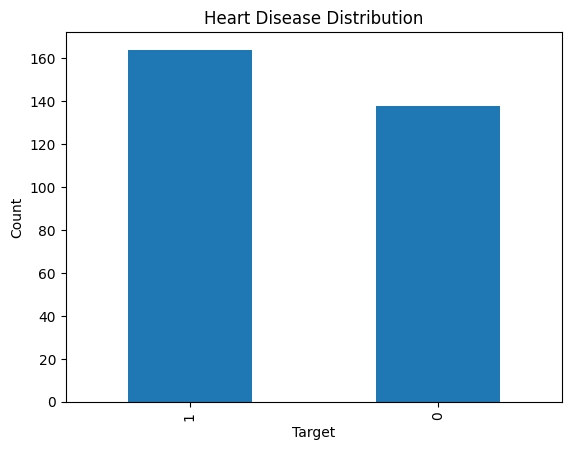

In [9]:
df["target"].value_counts()
df["target"].value_counts(normalize=True)

df["target"].value_counts().plot(kind="bar")
plt.title("Heart Disease Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

### Feature Analysis

In [10]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

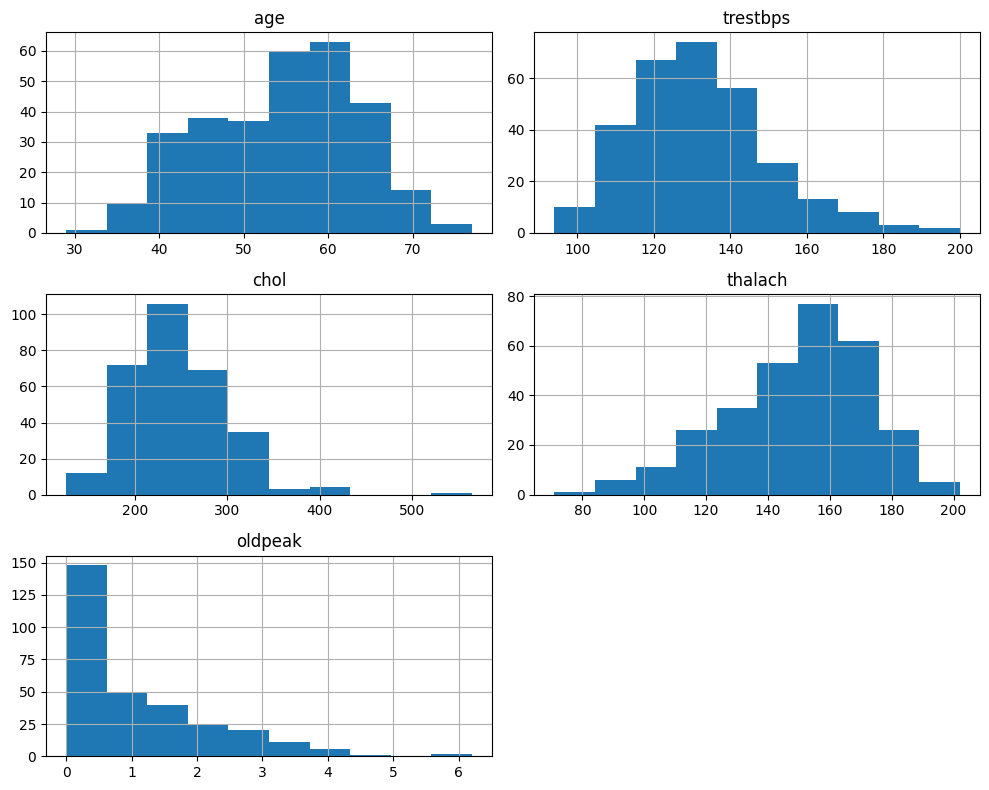

In [11]:
df[numerical_features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Insights:**


*   Age is almost normally distributed
*   Some have high resting blood pressure
*   Few have high serum cholestoral
*   Maximum heart rate achieved almost normally distributed
*   Few have high oldpeak



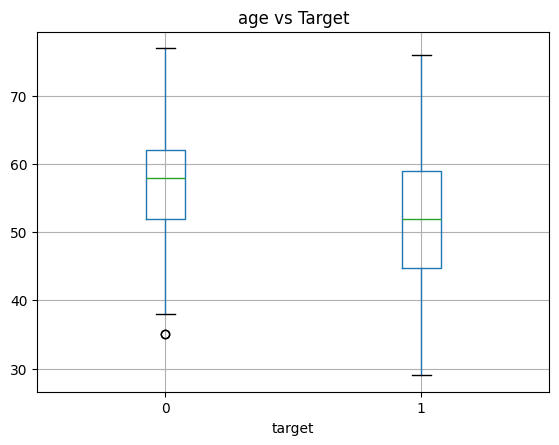

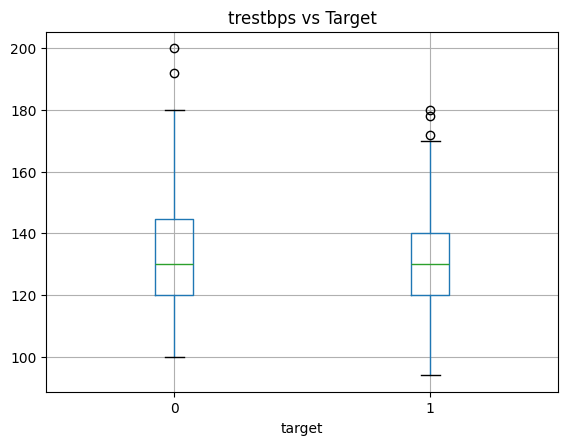

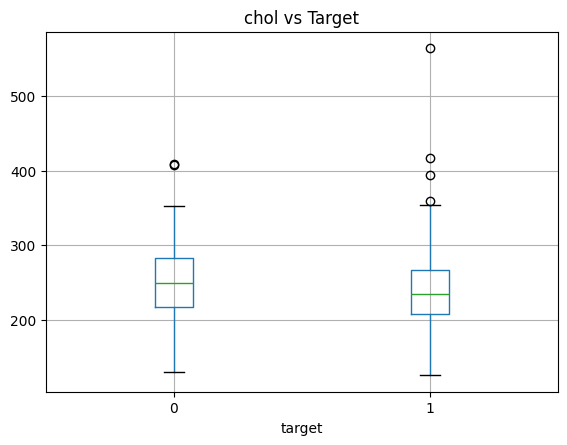

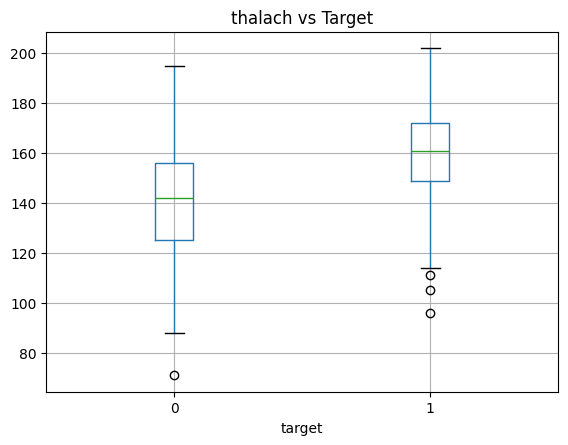

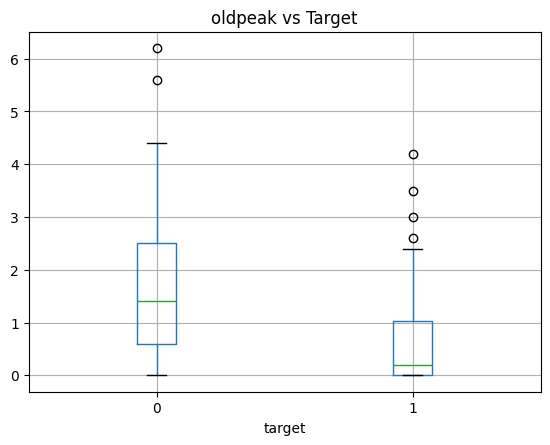

In [12]:
for col in numerical_features:
  df.boxplot(column=col, by="target")
  plt.title(f"{col} vs Target")
  plt.suptitle("")
  plt.show()

**Insights:**

*   Differences between target are seen in thalach and oldpeak

In [13]:
pd.crosstab(df["sex"], df["target"], normalize="index")

target,0,1
sex,,
0,0.250000,0.750000
1,0.553398,0.446602


Insights

*   Heart Disease is more common in sex 0 than sex 1

In [14]:
pd.crosstab(df["cp"], df["target"], normalize="index")

target,0,1
cp,,
0,0.727273,0.272727
1,0.180000,0.820000
2,0.209302,0.790698
3,0.304348,0.695652


In [15]:
pd.crosstab(df["fbs"], df["target"], normalize="index")

target,0,1
fbs,,
0,0.451362,0.548638
1,0.488889,0.511111


In [16]:
pd.crosstab(df["restecg"], df["target"], normalize="index")

target,0,1
restecg,,
0,0.537415,0.462585
1,0.370861,0.629139
2,0.750000,0.250000


In [17]:
pd.crosstab(df["exang"], df["target"], normalize="index")

target,0,1
exang,,
0,0.305419,0.694581
1,0.767677,0.232323


In [18]:
pd.crosstab(df["slope"], df["target"], normalize="index")

target,0,1
slope,,
0,0.571429,0.428571
1,0.650000,0.350000
2,0.248227,0.751773


In [19]:
pd.crosstab(df["ca"], df["target"], normalize="index")

target,0,1
ca,,
0,0.257143,0.742857
1,0.676923,0.323077
2,0.815789,0.184211
3,0.850000,0.150000
4,0.250000,0.750000


In [20]:
pd.crosstab(df["thal"], df["target"], normalize="index")

target,0,1
thal,,
0,0.500000,0.500000
1,0.666667,0.333333
2,0.218182,0.781818
3,0.760684,0.239316


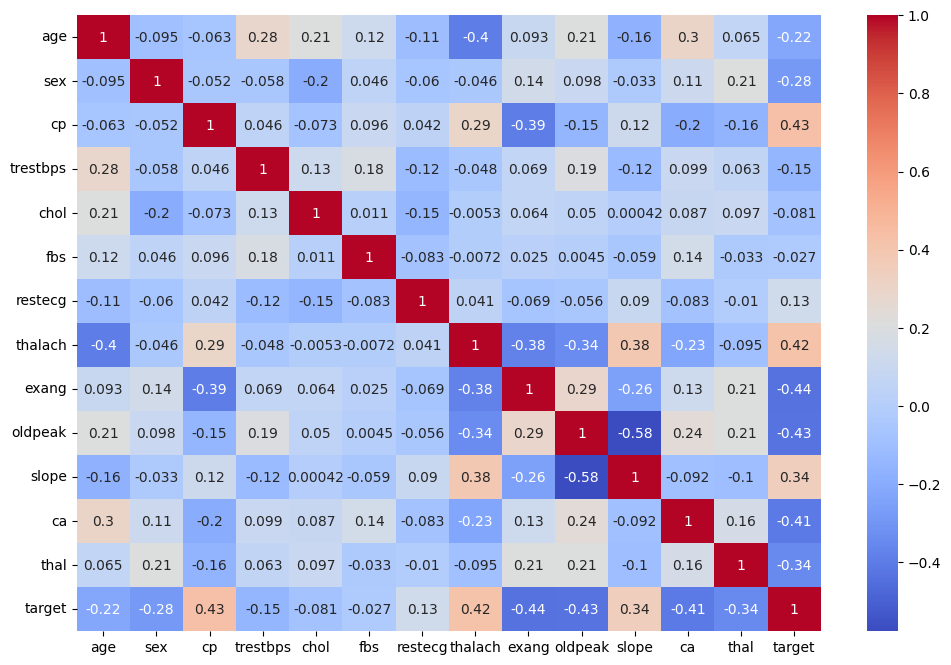

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

## Machine Learning

In [22]:
X, y = df.drop(columns=["target"]), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # (X - mean) / std
X_test_scaled = scaler.fit_transform(X_test)

y_train_np = y_train.values
y_test_np = y_test.values

### Logistic Regression

In [24]:
class LogisticRegression:
  def __init__(self, lr=0.01, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_pred = self.sigmoid(linear_model)

      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict_proba(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    return self.sigmoid(linear_model)

  def predict(self, X, threshold=0.5):
    probs = self.predict_proba(X)
    return (probs >= threshold).astype(int)

In [25]:
model = LogisticRegression(lr=0.01, n_iters=3000)
model.fit(X_train_scaled, y_train_np)

In [26]:
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test_np, y_pred)
cm

array([[20,  8],
       [ 4, 29]])

In [27]:
accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


In [28]:
print(classification_report(y_test_np, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [29]:
y_proba = model.predict_proba(X_test_scaled)

roc_auc = roc_auc_score(y_test_np, y_proba)
print("ROC-AUC", roc_auc)

ROC-AUC 0.8885281385281386


Insights:

*   The model detects 88% of heart disease cases, with a 78% precision.
*   The model shows acceptable discrimination between patients with and without heart disease.

### Decision Tree

In [30]:
class DecisionTree:
  class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
      self.feature = feature
      self.threshold = threshold
      self.left = left
      self.right = right
      self.value = value

  def __init__(self, max_depth=5, min_samples_split=10):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.root = None

  def fit(self, X, y):
    self.root = self._build_tree(X, y, depth=0)

  def _gini(self, y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

  def _best_split(self, X, y):
    best_gini = float("inf")
    best_features, best_threshold = None, None

    for feature in range(X.shape[1]):
      thresholds = np.unique(X[:, feature])
      for threshold in thresholds:
        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        if left_mask.sum() == 0 or right_mask.sum() == 0:
          continue

        gini = (left_mask.sum() * self._gini(y[left_mask])
                + right_mask.sum() * self._gini(y[right_mask])) / len(y)

        if gini < best_gini:
          best_gini = gini
          best_feature = feature
          best_threshold = threshold

    return best_feature, best_threshold

  def _build_tree(self, X, y, depth):
    num_samples, num_features = X.shape
    num_labels = len(np.unique(y))

    if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
      leaf_value = np.bincount(y).argmax()
      return self.Node(value=leaf_value)

    feature, threshold = self._best_split(X, y)

    if feature is None:
      leaf_value = np.bincount(y).argmax()
      return self.Node(value=leaf_value)

    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask

    left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
    right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

    return self.Node(feature, threshold, left, right)

  def predict(self, X):
    return np.array([self._traverse(x, self.root) for x in X])

  def _traverse(self, x, node):
    if node.value is not None:
      return node.value
    if x[node.feature] <= node.threshold:
      return self._traverse(x, node.left)
    return self._traverse(x, node.right)

In [31]:
tree = DecisionTree(max_depth=4)
tree.fit(X_train.values, y_train.values)

y_pred = tree.predict(X_test.values)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7213114754098361


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.75      0.73      0.74        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



Insights:

*   The model detects 73% of heart disease cases, with a 75% precision.

### Random Forest

In [33]:
class RandomForest:
  def __init__(self, n_trees=10, max_depth=5, min_samples_split=10, max_features=None):
    self.n_trees = n_trees
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.max_features = max_features
    self.trees = []

  def fit(self, X, y):
    self.trees = []
    n_samples, n_features = X.shape
    self.max_features = self.max_features or int(np.sqrt(n_features))

    for _ in range(self.n_trees):
      indices = np.random.choice(n_samples, n_samples, replace=True)
      X_sample = X[indices]
      y_sample = y[indices]

      tree = DecisionTree(max_depth=self.max_depth,
                          min_samples_split=self.min_samples_split)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)

  def predict(self, X):
    tree_preds = np.array([tree.predict(X) for tree in self.trees])

    y_pred = []
    for i in range(X.shape[0]):
      votes = Counter(tree_preds[:, i])
      y_pred.append(votes.most_common(1)[0][0])

    return np.array(y_pred)

In [34]:
rf = RandomForest(n_trees=20, max_depth=6, min_samples_split=5)
rf.fit(X_train.values, y_train.values)
y_pred = rf.predict(X_test.values)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Insights:

*   The model detects 85% of heart disease cases, with a 82% precision.